# Run basic evaluation based on validation output

## Import packages

In [49]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

## Load data from all frames

In [109]:
file_list = [f for f in listdir("validation_output") if isfile(join("validation_output", f))]
dfs = []
for i in range(len(file_list)):
    fname = "validation_output/" + file_list[i]
    df_temp = pd.read_csv(fname)
    df_temp["src"] = file_list[i].replace(".csv", "")
    dfs.append(df_temp)
df = pd.concat(dfs)

## Plots
### Average accuracy per round / comparison

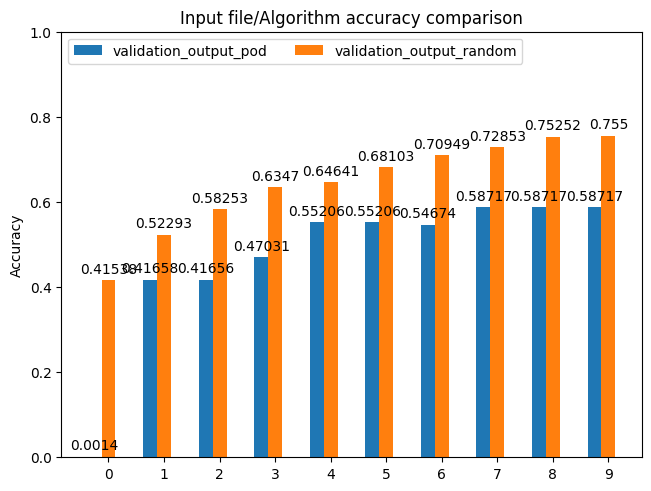

In [110]:
df_plot = df[['round', 'acc', 'src']].groupby(['src', 'round']).mean().reset_index()
rounds = df_plot['round'].unique()
res_dict = {}
for i in df_plot['src'].unique():
    res_dict[i] = df_plot[df_plot['src'] == i]['acc']
x = np.arange(len(rounds))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in res_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Input file/Algorithm accuracy comparison')
ax.set_xticks(x + width, rounds)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()

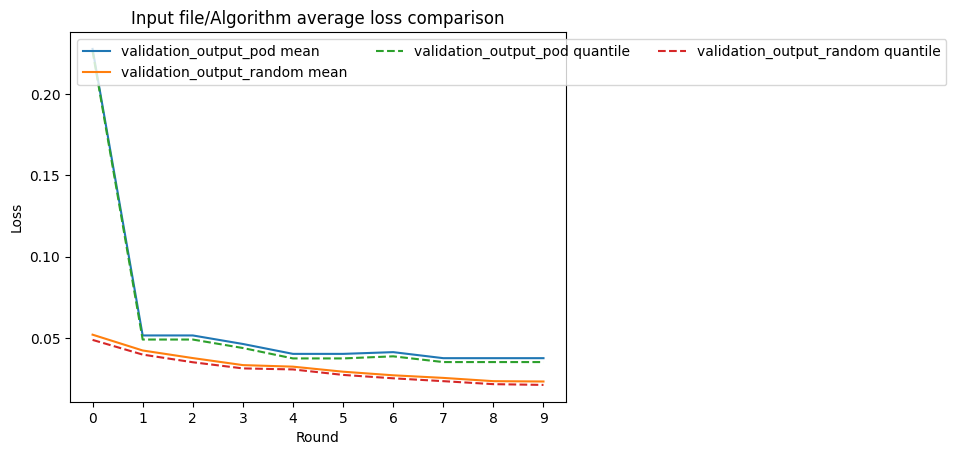

In [111]:
df_plot = df[['round', 'loss', 'src']].groupby(['src', 'round']).mean().reset_index()
df_plot_quantiles = df[['round', 'loss', 'src']].groupby(['src', 'round']).quantile(.01).reset_index()
rounds = df_plot['round'].unique()
mean_dict = {}
quantile_dict = {}
for i in df_plot['src'].unique():
    mean_dict[i+' mean'] = df_plot[df_plot['src'] == i]['loss']
    quantile_dict[i+' quantile'] = df_plot_quantiles[df_plot_quantiles['src'] == i]['loss']
x = np.arange(len(rounds))  # the label locations
plt.figure()
for key, value in mean_dict.items():
    plt.plot(rounds, value, label=key)
for key, value in quantile_dict.items():
    plt.plot(rounds, value, label=key, linestyle='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.z
plt.ylabel('Loss')
plt.title('Input file/Algorithm average loss comparison')
plt.xticks(rounds)
plt.xlabel('Round')
plt.legend(loc='upper left', ncols=3)

plt.show()

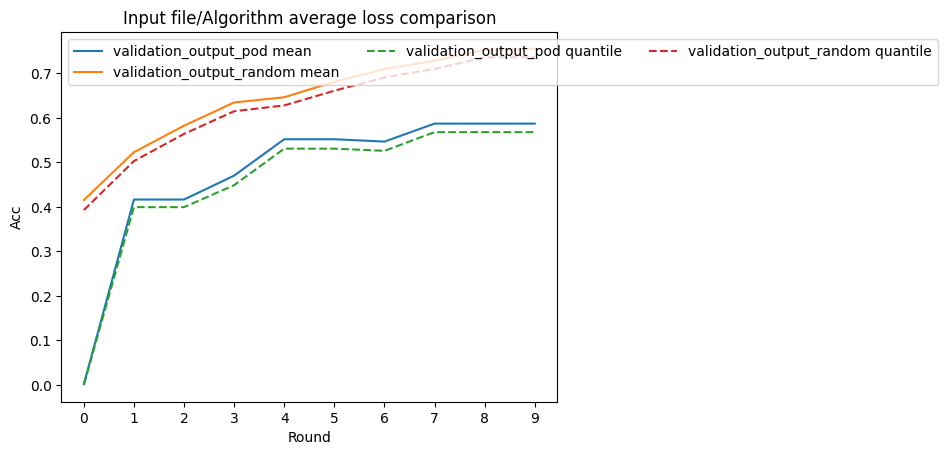

In [113]:
df_plot = df[['round', 'acc', 'src']].groupby(['src', 'round']).mean().reset_index()
df_plot_quantiles = df[['round', 'acc', 'src']].groupby(['src', 'round']).quantile(.1).reset_index()
rounds = df_plot['round'].unique()
mean_dict = {}
quantile_dict = {}
for i in df_plot['src'].unique():
    mean_dict[i+' mean'] = df_plot[df_plot['src'] == i]['acc']
    quantile_dict[i+' quantile'] = df_plot_quantiles[df_plot_quantiles['src'] == i]['acc']
x = np.arange(len(rounds))  # the label locations
plt.figure()
for key, value in mean_dict.items():
    plt.plot(rounds, value, label=key)
for key, value in quantile_dict.items():
    plt.plot(rounds, value, label=key, linestyle='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.z
plt.ylabel('Acc')
plt.title('Input file/Algorithm average loss comparison')
plt.xticks(rounds)
plt.xlabel('Round')
plt.legend(loc='upper left', ncols=3)

plt.show()

In [108]:
df_plot_quantiles

,src,round,acc
0,validation_output,0,0.3929
1,validation_output,1,0.5030
2,validation_output,2,0.5640
3,validation_output,3,0.6150
4,validation_output,4,0.6280
5,validation_output,5,0.6610
6,validation_output,6,0.6909
7,validation_output,7,0.7100
8,validation_output,8,0.7360
9,validation_output,9,0.7369
